# Testy normalności

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as sm_stats

from scipy import stats

Jednym z podstawowych kryteriów stosowalności technik statystycznych jest **rozkład danych**, do którego konkretna technika zostanie użyta. 

W podstawowych zastosowaniach interesuje nas właściwie jedynie czy rozkład populacji jest normalny, czy nie. Rozkład populacji staramy się ustalić na podstawie zebranej próby, więc w tym celu stosujemy odpowiednie testy statystyczne. 

Najbardziej uniwersalnym i w obecnych czasach najbardziej rozpowszechnionym testem używanym do tego celu jest **test Shapiro-Wilka**.

## Testy normalności - test Shapiro-Wilka
\begin{equation*}
\begin{split}
    H_0&: \text{rozkład badanej cechy jest normalny}\\
    H_1&: \text{rozkład badanej cechy nie jest normalny}
\end{split}
\end{equation*}

Statystyka testowa \textbf{testu Shapiro-Wilka} dana jest wzorem
\begin{equation*}
    T = \frac{\Big( \sum_{i=1}^{[\frac{n}{2}]}a_i(n)(X_{n-i+1:n} - X_{i:n} \Big)^2}{\sum_{i=1}^n(X_i - \overline{X})^2},
\end{equation*}
gdzie $a_i(n)$ są pewnymi stałymi zależnymi od liczności próby, natomiast $[n/2]$ oznacza część całkowitą wyrażenia $n/2$.

Obszar krytyczny ma postać
\begin{equation*}
    W_{\alpha} = (0, w(\alpha, n)],
\end{equation*}
gdzie $w(\alpha, n)$ oznacza kwantyl rzędu $\alpha$ rozkładu statystyki.


In [5]:
?stats.shapiro

Signature: stats.shapiro(x, *, axis=None, nan_policy='propagate', keepdims=False)
Docstring:
Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the
data was drawn from a normal distribution.

Parameters
----------
x : array_like
    Array of sample data.
axis : int or None, default: None
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
      which the  statistic is computed, the corresponding entry of the output
      will be NaN.
    - ``omit``: NaNs will be omitted when performing the calculation.
      If insufficient data remains in the axis slice along which

## Zadanie 
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) dla rozkładu chi-kwadrat,

c) dla rozkładu wykładniczego,

sporządź histogramy dla wygenerowanych próbek i sprawdź zachowanie się testu Shapiro-Wilka. Przyjmij poziom istotności 0.05.

In [2]:
n =10
norm = stats.norm.rvs(size = n,loc = 2,scale = 0.5)
print(stats.shapiro(norm))
norm_error = stats.norm.rvs(size = n,loc = 2,scale = 0.5)+stats.uniform.rvs(size = n,loc = -0.6,scale = 1.2)
print(stats.shapiro(norm_error))
chi = stats.chi2.rvs(size = n, df = 5)
print(stats.shapiro(chi))
exp = stats.expon.rvs(size = n, scale = 1/2)
print(stats.shapiro(exp))

ShapiroResult(statistic=0.9509468654910888, pvalue=0.6797121861165623)
ShapiroResult(statistic=0.9236016290075002, pvalue=0.3879752899906033)
ShapiroResult(statistic=0.8110679821676178, pvalue=0.019755292738639872)
ShapiroResult(statistic=0.8461997986545403, pvalue=0.052337371263858436)


In [3]:
n =5000
norm = stats.norm.rvs(size = n,loc = 2,scale = 0.5)
print(stats.shapiro(norm))
norm_error = stats.norm.rvs(size = n,loc = 2,scale = 0.5)+stats.uniform.rvs(size = n,loc = -0.6,scale = 1.2)
print(stats.shapiro(norm_error))
chi = stats.chi2.rvs(size = n, df = 5)
print(stats.shapiro(chi))
exp = stats.expon.rvs(size = n, scale = 1/2)
print(stats.shapiro(exp))

ShapiroResult(statistic=0.999645059199681, pvalue=0.540785114822715)
ShapiroResult(statistic=0.9993861840792796, pvalue=0.09097166599472122)
ShapiroResult(statistic=0.9120233474922603, pvalue=4.439160505571821e-47)
ShapiroResult(statistic=0.8210931255871854, pvalue=1.6774466799850367e-59)


In [6]:
n =5000
k = 10000
rej = []
for i in range(k):
  norm = stats.norm.rvs(size = n,loc = 2,scale = 0.5)
  rej.append(stats.shapiro(norm)[1]<0.05)
sum(rej)/k

0.0417

In [8]:
n =5000
k = 10000
rej = []
for i in range(k):
  cau = stats.cauchy.rvs(size = n)
  rej.append(stats.shapiro(cau)[1]>0.05)
sum(rej)/k

0.0

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki i sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

In [9]:
alpha = 0.05
mu = np.linspace(-5, 5, 50)
sigma = np.round(stats.uniform.rvs(size=50, loc=0, scale=2), 2)
nobs = [5, 10, 20, 50, 100, 500, 1000]
for n in nobs:
    reject = 0
    print("---------------------------------")
    for m, s in zip(mu, sigma):
        x = stats.norm.rvs(size=n, loc=m, scale=s)
        pval = stats.shapiro(x)[1]
        print("P-value testu Shapiro-Wilka dla mu={}, sigma={}, n={}: {}".format(m, s, n, pval))
        if pval < alpha: reject += 1
    print("---------------------------------")
    print("Hipoteza o normalności została odrzucona {} razy dla n={}".format(reject, n))
    #dla dużych próbek ok, fałszywie odrzuca mniej niż alpha*n razy

---------------------------------
P-value testu Shapiro-Wilka dla mu=-5.0, sigma=0.24, n=5: 0.29527474261451353
P-value testu Shapiro-Wilka dla mu=-4.795918367346939, sigma=0.11, n=5: 0.12690817300806267
P-value testu Shapiro-Wilka dla mu=-4.591836734693878, sigma=0.15, n=5: 0.05075939178011778
P-value testu Shapiro-Wilka dla mu=-4.387755102040816, sigma=0.45, n=5: 0.4442003260535846
P-value testu Shapiro-Wilka dla mu=-4.183673469387755, sigma=0.26, n=5: 0.27517022031440075
P-value testu Shapiro-Wilka dla mu=-3.979591836734694, sigma=0.55, n=5: 0.05295801302438061
P-value testu Shapiro-Wilka dla mu=-3.7755102040816326, sigma=0.06, n=5: 0.8899951805237394
P-value testu Shapiro-Wilka dla mu=-3.571428571428571, sigma=1.27, n=5: 0.1307781888973455
P-value testu Shapiro-Wilka dla mu=-3.36734693877551, sigma=1.56, n=5: 0.4219718950643777
P-value testu Shapiro-Wilka dla mu=-3.163265306122449, sigma=1.7, n=5: 0.08568995901644125
P-value testu Shapiro-Wilka dla mu=-2.9591836734693877, sigma=0.9

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki. Przy generowaniu próbki dodaj pewien błąd. Sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

In [10]:
mu = np.linspace(-5, 5, 50)
sigma = np.round(stats.uniform.rvs(size=50, loc=0, scale=1), 2)
nobs = [5, 10, 20, 50, 100, 500, 5000]
for n in nobs:
    print("---------------------------------")
    reject = 0
    for m, s in zip(mu, sigma):
        x = stats.norm.rvs(size=n, loc=m, scale=s) + stats.uniform.rvs(size=n, loc=-2, scale=4)
        pval = stats.shapiro(x)[1]
        print("P-value testu Shapiro-Wilka dla mu={}, sigma={}, n={}: {}".format(m, s, n, pval))
        if pval < alpha: reject += 1
    print("---------------------------------")
    print("Hipoteza o normalności została odrzucona {} razy dla n={}".format(reject, n))

---------------------------------
P-value testu Shapiro-Wilka dla mu=-5.0, sigma=0.56, n=5: 0.5335969615420251
P-value testu Shapiro-Wilka dla mu=-4.795918367346939, sigma=0.11, n=5: 0.8309238785310744
P-value testu Shapiro-Wilka dla mu=-4.591836734693878, sigma=0.56, n=5: 0.15398891136147091
P-value testu Shapiro-Wilka dla mu=-4.387755102040816, sigma=0.08, n=5: 0.1713974974685546
P-value testu Shapiro-Wilka dla mu=-4.183673469387755, sigma=0.25, n=5: 0.8537722529338443
P-value testu Shapiro-Wilka dla mu=-3.979591836734694, sigma=0.52, n=5: 0.3244257211503639
P-value testu Shapiro-Wilka dla mu=-3.7755102040816326, sigma=0.37, n=5: 0.38742372550117893
P-value testu Shapiro-Wilka dla mu=-3.571428571428571, sigma=0.29, n=5: 0.4389061256749998
P-value testu Shapiro-Wilka dla mu=-3.36734693877551, sigma=0.23, n=5: 0.6513430964626332
P-value testu Shapiro-Wilka dla mu=-3.163265306122449, sigma=0.82, n=5: 0.03550848443714867
P-value testu Shapiro-Wilka dla mu=-2.9591836734693877, sigma=0.83,

In [ ]:
# test powinien dobrze dzialac dla dowolnej mu i dowolnej simgy, ktory dowolnie generujemy

## ***Metody graficzne

- histogram (z naniesionym fitem rozkładu normalnego)

- $qq$-plot:
    * oś x - teoretyczne kwantyle z rozkładu normalnego
    * oś y - empiryczne kwantyle wyznaczone na podstawie próby; punkty na wykresie powinny układać wzdłuż prostej $y=x$.

In [11]:
?stats.norm.fit

Signature: stats.norm.fit(data, **kwds)
Docstring:
Return estimates of shape (if applicable), location, and scale
parameters from data. The default estimation method is Maximum
Likelihood Estimation (MLE), but Method of Moments (MM)
is also available.

Starting estimates for the fit are given by input arguments;
for any arguments not provided with starting estimates,
``self._fitstart(data)`` is called to generate such.

One can hold some parameters fixed to specific values by passing in
keyword arguments ``f0``, ``f1``, ..., ``fn`` (for shape parameters)
and ``floc`` and ``fscale`` (for location and scale parameters,
respectively).

Parameters
----------
data : array_like or `CensoredData` instance
    Data to use in estimating the distribution parameters.
arg1, arg2, arg3,... : floats, optional
    Starting value(s) for any shape-characterizing arguments (those not
    provided will be determined by a call to ``_fitstart(data)``).
    No default value.
**kwds : floats, optional
    - 

In [ ]:
# ?sm.qqplot

In [12]:
n = 100
# generuje probki o konkretnych rozkladach o liczebnosci n=100
norm2 = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-2, scale=4)
norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)

ShapiroResult(statistic=0.9951802665259599, pvalue=0.9795304620226449)


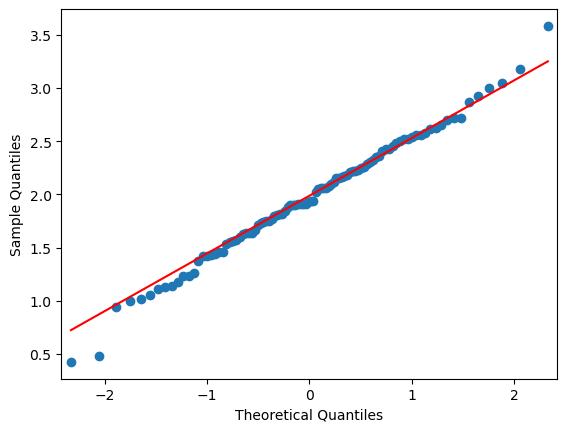

In [13]:
sm.qqplot(norm, stats.norm, line='q') # dla probki normalnego rozkladu
print(stats.shapiro(norm))
plt.show()

In [ ]:
# kropki ukladaja sie wzdluz czerwonej linii

ShapiroResult(statistic=0.9421703780085112, pvalue=0.0002621477070910569)


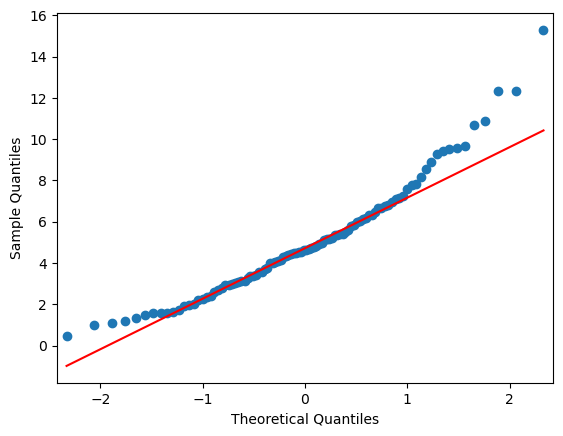

In [14]:
sm.qqplot(chi, stats.norm, line='q')
print(stats.shapiro(chi))
plt.show()

In [ ]:
# dla ukladu ktory nie jest normalny punkty zaczynaja uciekac

ShapiroResult(statistic=0.9824020767395365, pvalue=0.20361333010456661)


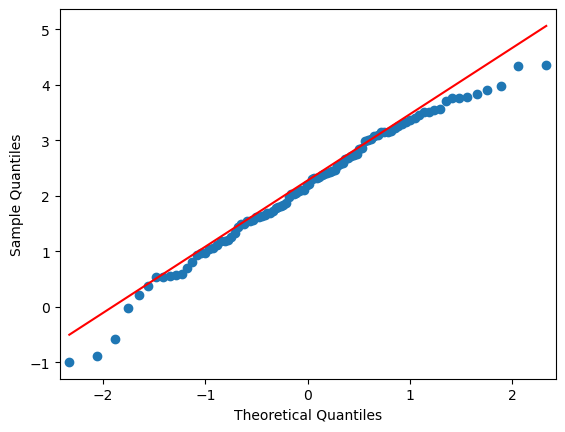

In [15]:
sm.qqplot(norm2, stats.norm, line='q')
print(stats.shapiro(norm2))
plt.show()

In [16]:
# w tym przypadku juz bardzo uciekaja punkty

In [ ]:
# o wykresiach - 
# pierwsza os (poziobma) to sa wartosci kwantyli rozkladu normalnego
# na osi y - kwantyle empiryczne 

In [17]:
norm

array([1.84395162, 1.90900959, 2.55595224, 2.09342983, 2.42916176,
       2.17500976, 1.14087772, 2.86637588, 2.06385715, 1.45954268,
       2.24692583, 1.13194402, 1.57619273, 1.77340688, 2.47984785,
       1.43704106, 2.69650132, 2.28697013, 0.48238871, 2.17895681,
       2.57617106, 1.81481503, 2.07731175, 2.43083653, 1.74947022,
       1.5553991 , 1.7977845 , 1.75027125, 1.62941667, 1.90236195,
       1.60021034, 1.91256687, 2.21798898, 1.63779395, 1.81573014,
       3.04650753, 1.17361309, 2.06221074, 3.58387996, 1.11001795,
       1.92857352, 3.18269592, 0.94664121, 2.71435462, 1.93809222,
       1.55825476, 1.01619692, 2.61247532, 2.26007528, 1.66256273,
       2.30504088, 1.63852885, 2.04991529, 1.45625441, 2.16724768,
       2.45224229, 2.22428221, 2.3510964 , 1.41937696, 2.72161682,
       2.02705271, 1.88530182, 1.90595759, 2.56252299, 2.21507947,
       0.99720975, 2.32162751, 2.49923372, 2.15882199, 1.89813977,
       1.93892457, 1.42718327, 2.62226   , 1.05750063, 2.36035

In [20]:
np.quantile(norm, 0.9) # kwantyle empiryczme 
# czyli 90 procent wartosc jest mniejszych niz kwantyl empiryczny
# jak jest rozklad normalny to kwantyle empiryczne powinny przyblizac
# teoretyczne wartosci z rozkladu normalnego
# czyli punkty powinny ukladac sie wzdluz osi
# zawsze wzdluz linii jak jest rozklad normalny!

2.625292601867988

## Zadanie
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) rozkładu chi-kwadrat,

c) rozkładu wykładniczego,

sporządź histogramy z naniesionym filtrem rozkładu normalnego oraz wykresy $qq$-plot. Na podstawie otrzymanych rysunków oceń czy rozkład jest normalny.

In [33]:
n =100000
norm = stats.norm.rvs(size = n,loc = 2,scale = 0.5)
# zaszumienie nizej rozkladu normalnego rozkladem jednostajnym
norm_error = stats.norm.rvs(size = n,loc = 2,scale = 0.5)+stats.uniform.rvs(size = n,loc = -0.6,scale = 1.2)
chi = stats.chi2.rvs(size = n, df = 5)
exp = stats.expon.rvs(size = n, scale = 1/2)
cau = stats.cauchy.rvs(size = n)

1.9989589885476213 0.5005401840218502
1.9982402916637327 0.6089403087237109
4.9918057036088985 3.1586506167213058
0.5007382560702685 0.5020816126509213
0.5007382560702685 0.5020816126509213


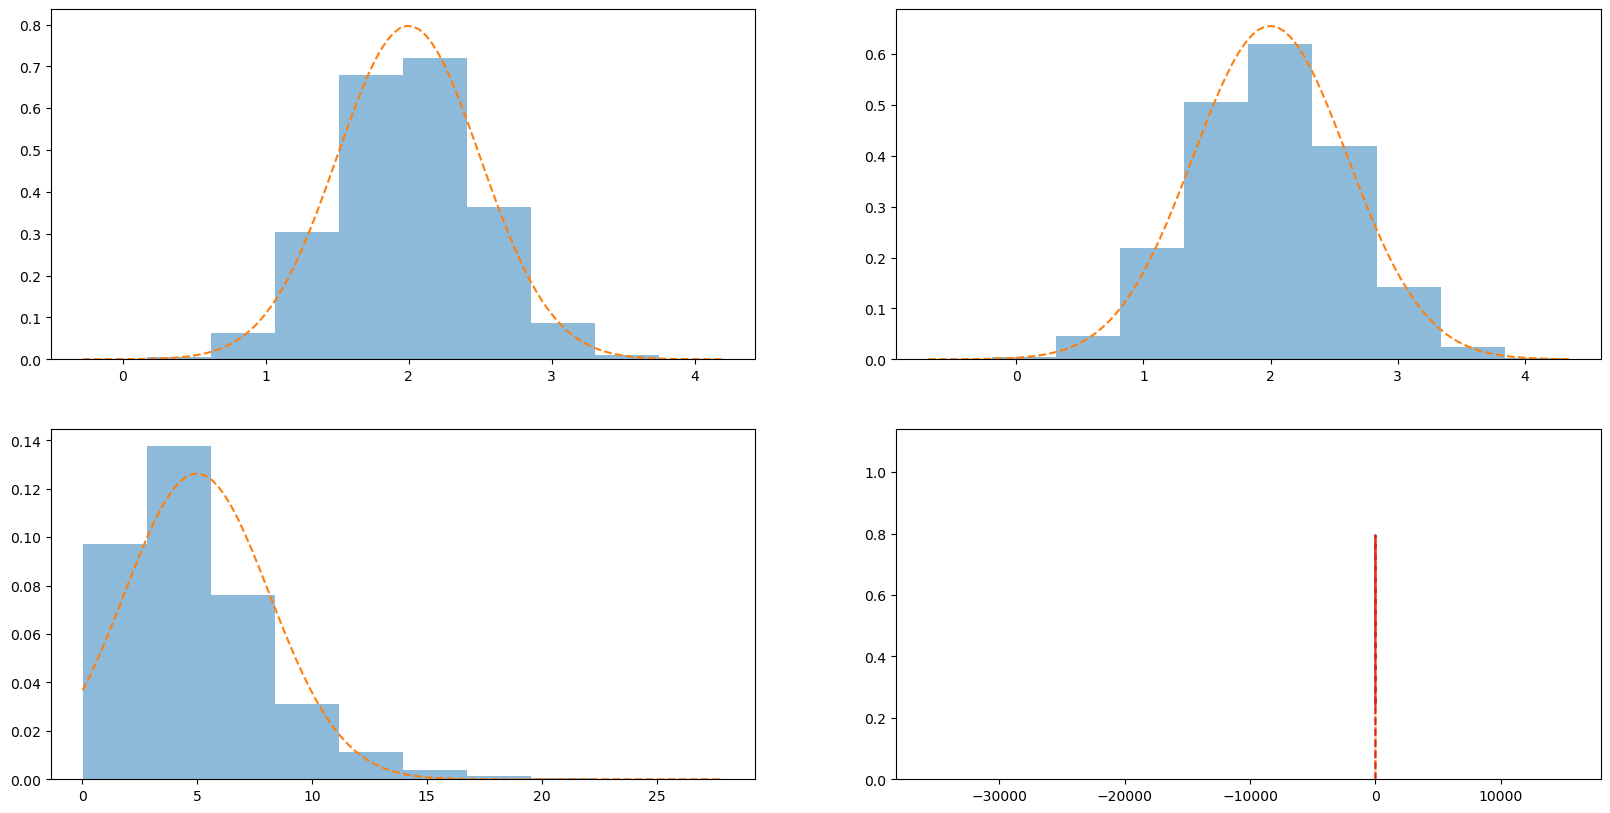

In [34]:
# histogram z naniesionym filtrem rozkładu normalnego
m1, s1 = stats.norm.fit(norm)
print(m1, s1)
m2, s2 = stats.norm.fit(norm_error)
print(m2, s2)
m3, s3 = stats.norm.fit(chi)
print(m3, s3)
m4, s4 = stats.norm.fit(exp)
print(m4, s4)

m5, s5 = stats.norm.fit(exp)
print(m5, s5)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
N_bins = 10

x_range = np.linspace(norm.min(), norm.max(), 100)
ax[0, 0].hist(norm, bins=N_bins, density=True, alpha=0.5)
ax[0, 0].plot(x_range, stats.norm.pdf(x_range, m1, s1), '--')

x_range = np.linspace(norm_error.min(), norm_error.max(), 100)
ax[0, 1].hist(norm_error, bins=N_bins, density=True, alpha=0.5)
ax[0, 1].plot(x_range, stats.norm.pdf(x_range, m2, s2), '--')

x_range = np.linspace(chi.min(), chi.max(), 100)
ax[1, 0].hist(chi, bins=N_bins, density=True, alpha=0.5)
ax[1, 0].plot(x_range, stats.norm.pdf(x_range, m3, s3), '--')

x_range = np.linspace(exp.min(), exp.max(), 100)
ax[1, 1].hist(exp, bins=N_bins, density=True, alpha=0.5)
ax[1, 1].plot(x_range, stats.norm.pdf(x_range, m4, s4), '--')

x_range = np.linspace(norm.min(), norm.max(), 100)
ax[1, 1].hist(cau, bins=N_bins, density=True, alpha=0.5)
ax[1, 1].plot(x_range, stats.norm.pdf(x_range, m5, s5), '--')

C:\Users\BPE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.999961174422534, pvalue=0.31625568337764365)


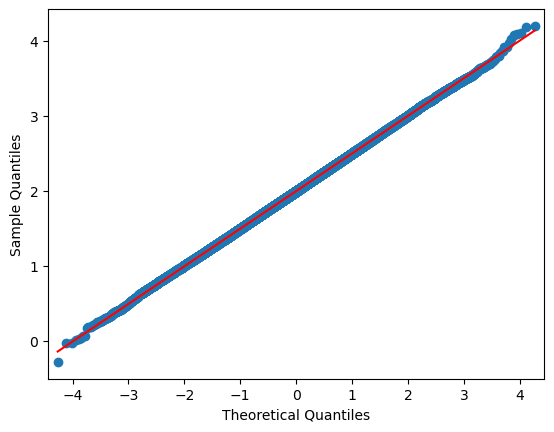

In [35]:
sm.qqplot(norm, stats.norm, line='q')
print(stats.shapiro(norm))
plt.show()

ShapiroResult(statistic=0.9998311569168096, pvalue=2.1379181535120073e-06)


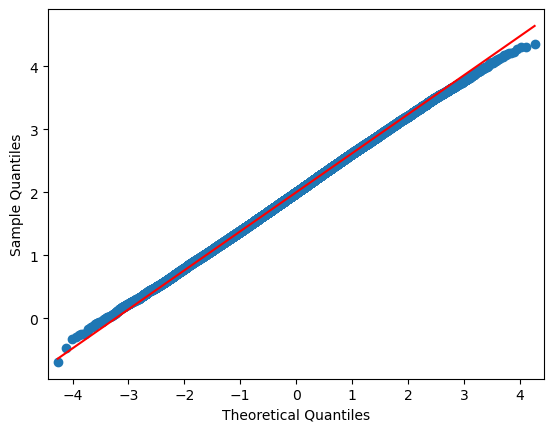

In [36]:
sm.qqplot(norm_error, stats.norm, line='q')
print(stats.shapiro(norm_error))
plt.show()

ShapiroResult(statistic=0.01236333077944518, pvalue=4.9724158623077e-184)


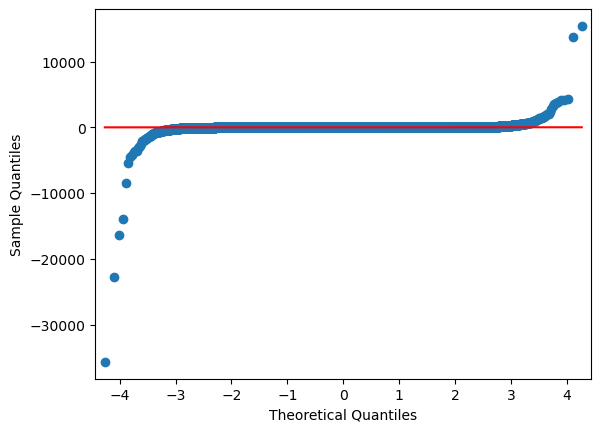

In [37]:
sm.qqplot(cau, stats.norm, line='q')
print(stats.shapiro(cau))
plt.show()
# dla cauchyego na konca odstajace sa mocno wartosci

In [39]:
# qqplot to identyfikacji czy cos pochodzi z rozkladu normalnego

In [ ]:
# ale mozna tez sprawdzic inne rozklady, 
# ale z reguly jest uzywany do identyfikacji czy probka pochodzi z zadanego ukladu

## ***Inne testy do badania normalności

* testy oparte na kurtozie i skośności:
    - [test D'Agostino $K^2$](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test): `scipy.stats.normaltest`;

    - [test Jarque–Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test): `scipy.stats.jarque_bera`;
    
* testy oparte na dystrybuancie empirycznej:
    - [test Kolmogorova–Smirnova](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test): `scipy.stats.kstest`;
    
    - [test Lilliefors](https://en.wikipedia.org/wiki/Lilliefors_test): `statsmodels.stats.diagnostic.lilliefors`;

In [ ]:
# test omnibusowy
# pierwsze dwa uzywa sie przy duzej probie - powyzej 5 000 
# najlepiej przy takiej probie puscic oba
# 

In [ ]:
# test kolomogorova i lilliefors to sprawdzamy ogolnie rozklady ciagle

## Test typu omnibus D’Agostino-Pearsona oparty o kurtozę i skośność
Łącząc dwa testy otrzymuje się test czuły na odstępstwa od normalności zarówno w postaci niezerowej skośności jak i kurtozy istotnie różniej od 3.

Statystyką testową jest
$$
K^2=(Z(\sqrt{b_1}))^2+ (Z(b_2))^2,
$$
gdzie $Z(\sqrt{b_1})$ to  statystyka  testowa  testu  opartego  o  skośność  a $Z(b_2)$  to  statystyka  testowa  testu opartego o kurtozę.

Asymptotyczny rozkład tej statystyki to rozkład $\chi^2$.

Ponadto:
$m_k = \frac{1}{n}\sum_{i=1}^n (x_i -\overline{x})^k$, $\sqrt{b_1} = \frac{m_3}{m_2^{3/2}}$, $b_2 = \frac{m4}{m_2^2}-3$.

## Test typu omnibus Jarque-Bera oparty o kurtozę i skośność
Innym testem opartym o kurtozę i skośność jest test Jarque-Bera. Statystyka testowaw przypadku tego testu ma łatwiejszą postać niż dla testu D’Agostino-Pearsona. Traci się jednak na niedokładnym oszacowaniu wartości krytycznych przy niewielkich wielkościach próby. Asymptotycznie ten test jest tak samo mocny jak test D’Agostino-Pearsona, ale na asymptotykę można liczyć jedynie w przypadku dużych prób.

Statystyka testowa ma postać:
$$
    \text{JB} = \frac{n}{6}\Big((\sqrt{b_1})^2 + \frac{1}{4}(b_2-3)^2\Big).
$$


## Test Kołmogorova-Smirnova

Test oparty o odległość supremum pomiędzy dystrybuantami empiryczną $F_n$ i teoretyczną $F$
$$
d(F_n, F) = \sup_{x}|F_n(x) - F(x)|.
$$

Statystka testowa oparta o powyższą odległość sprowadza się do liczenia maksimum modułu różnicy dystrybuant w punktach skoku dystrybuanty empirycznej:
$$
D = \max_{x_i}|F_n(x_i) - F(x_i)|.
$$

Rozkład statystyki testowej można wyznaczyć w sposób dokładny dla prostej hipotezy zerowej, a więc dla porównania z jednym określonym rozkładem. Asymptotycznie, ta statystyka przemnożona przez $\sqrt{n}$ ma rozkład Kołmogorowa.

Test ten pomimo łatwego opisu probabilistycznego nie jest stosowany z uwagi na moc niższą niż konkurencja.

## Test Lillieforsa

Ten test to modyfikacja testu Kołmogorowa-Smirnowa zaproponowana przez Huberta Lillieforsa, pozwalająca na testowanie zgodności z całą rodziną rozkładów normalnych, bez znajomości parametrów średniej i odchylenia standardowego (test Kołmogorowa-Smirnowa pozwala na zbadanie zgodnościz jednym określonym rozkładem).

Statystyka testowa w przypadku testu Lillieforsa wygląda tak samo jak w przypadku testu Kołmogorowa-Smirnowa. Różnica polega na zastosowaniu innego rozkładu dla statystyki testowej (przybliżenie rozkładu dokładnego), uwzględniającego to, że hipoteza zerowa jest hipotezą złożoną.

In [ ]:
# ?stats.normaltest

In [ ]:
# ?stats.jarque_bera

In [ ]:
# ?stats.kstest

In [ ]:
# ?sm_stats.diagnostic.lilliefors

In [43]:
n =1000000
norm = stats.norm.rvs(size = n,loc = 2,scale = 0.5)
norm_error = stats.norm.rvs(size = n,loc = 2,scale = 0.5)+stats.uniform.rvs(size = n,loc = -0.6,scale = 1.2)
print(stats.jarque_bera(norm_error))
print(stats.jarque_bera(norm))
print(stats.normaltest(norm_error))
print(stats.normaltest(norm))

SignificanceResult(statistic=615.4308488484419, pvalue=2.2955627880037234e-134)
SignificanceResult(statistic=8.161462354496585, pvalue=0.016895107816928476)
NormaltestResult(statistic=697.6179032879321, pvalue=3.2673605611471435e-152)
NormaltestResult(statistic=8.092336678816494, pvalue=0.017489259323687438)


## Zadanie
Napisz funkcję, która dla dowolnej próbki zwróci ramkę danych z wyznaczonymi statystykami testowymi i $p$-wartościami dla poznanych testów normalności.

In [ ]:
# def normal_tests(x):
#     pass

## Zadanie
Wczytaj dane `mtcars.csv` i sprawdź normalność każdej z kolumn (za pomocą testów statystycznych oraz metod graficznych). 

In [ ]:
# mtcars = pd.read_csv("../data/mtcars.csv")
# mtcars.head()